## Credits

EasyGeppy is based on Geppy project (https://github.com/ShuhuaGao/geppy)

This example is based on the Geppy example: https://github.com/ShuhuaGao/geppy/blob/master/examples/sr/numerical_expression_inference-ENC.ipynb

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from src.easy_geppy import EasyGeppy

## Synthetic dataset

In [2]:
def f(x):
    """ Ground truth function"""
    return -2 * x ** 2 + 11 * x + 13

### Generate samples

In [3]:
n_cases = 100
X = np.random.uniform(-10, 10, size=n_cases)   # random numbers in range [-10, 10)
Y = f(X) + (np.random.normal(size=n_cases)*10) # Gaussian noise

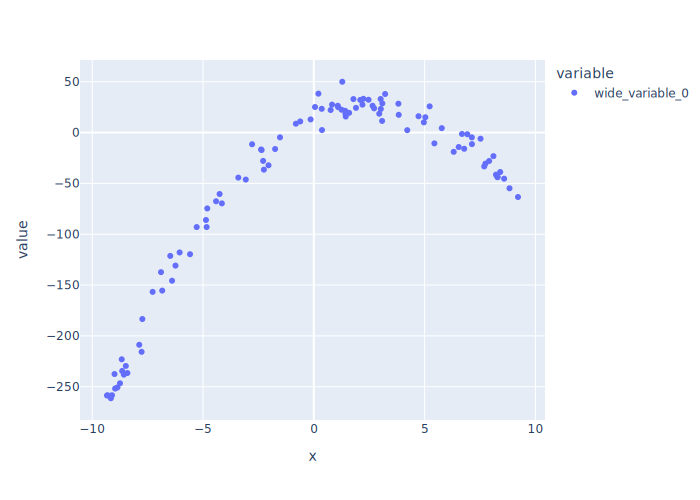

In [4]:
fig = px.scatter(x=X, y=[Y])
fig.show('svg')

### Increased noise observations

In [5]:
df = pd.DataFrame(X, columns=['x'])
df['y'] = Y
df['y1'] = Y+(np.random.normal(size=n_cases)*5)
df['y2'] = Y+(np.random.normal(size=n_cases)*10)
df['y3'] = Y+(np.random.normal(size=n_cases)*25)
df['y4'] = Y+(np.random.normal(size=n_cases)*50)
df

,x,y,y1,y2,y3,y4
0,8.830596,-54.829669,-53.182582,-65.058884,-15.922841,-70.457927
1,-9.301202,-258.458463,-255.439767,-256.025654,-253.095336,-216.287662
2,7.744953,-30.580852,-27.292095,-38.415350,-19.223125,-48.993437
3,-6.841084,-155.472869,-151.119267,-148.810639,-137.678113,-98.079579
4,0.759670,22.150894,28.298640,16.284680,41.509688,-9.710990
...,...,...,...,...,...,...
95,-3.070381,-46.269386,-42.781526,-50.736302,-14.931610,-15.078213
96,1.415474,21.408649,27.006467,29.384493,-10.814883,90.079863
97,3.081654,11.402841,4.280514,2.255098,16.366273,13.140240
98,7.136150,-11.388409,-9.059842,-18.803048,8.447452,-11.025254


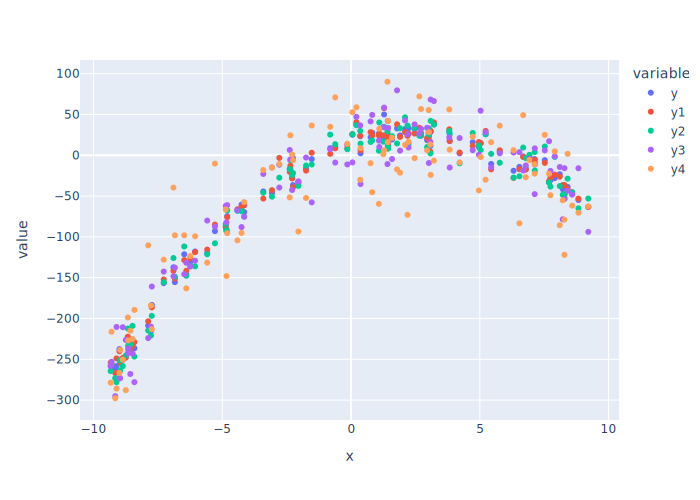

In [6]:
fig = px.scatter(df,x='x',y=['y','y1','y2','y3','y4'])
fig.show('svg')

## Define inputs and outputs

### Choose one output column

In [7]:
y_column = 'y4' # y4 is the most noisy so we're taking it

### You may choose many columns as input (remember to drop the y_column)

In [8]:
x_inputs = list(df.drop(y_column,axis=1).columns)
x_inputs

['x', 'y', 'y1', 'y2', 'y3']

### But we will use only the 'x' column from the dataset for this example

In [9]:
x_inputs = ['x']

## Create EasyGeppy instance and Initialize

In [10]:
egp = EasyGeppy(df,
                 x_columns=x_inputs,
                 y_column=y_column)

### Set default initialization

In [11]:
egp.default_initialization()

## Run evolution loop

In [12]:
egp.launch_evolution(n_pop=300, n_gen=100)

gen	nevals	size	avg        	std        	min     	max        
0  	100   	100 	4.83564e+11	3.28312e+12	0.179502	2.78749e+13
1  	99    	100 	3.65717e+06	2.41255e+07	0.179502	1.96089e+08
2  	99    	100 	1.72398e+12	1.71534e+13	0.152418	1.72398e+14
3  	99    	100 	297166     	2.95567e+06	0.152418	2.97057e+07
4  	99    	100 	4.76899e+06	3.54578e+07	0.152418	3.29229e+08
5  	99    	100 	2.66911e+16	2.65573e+17	0.152418	2.66911e+18
6  	99    	100 	7.35282e+06	4.75414e+07	0.14052 	4.40649e+08
7  	99    	100 	3.36472e+10	3.34723e+11	0.130392	3.3641e+12 
8  	99    	100 	4.0905e+06 	2.31987e+07	0.130392	2.08174e+08
9  	99    	100 	1.17717e+07	1.03082e+08	0.130392	1.02973e+09
10 	99    	100 	1.33054e+07	1.06717e+08	0.130392	1.03794e+09
11 	99    	100 	1.69162e+06	1.6822e+07 	0.130392	1.69069e+08
12 	99    	100 	1.72268e+06	1.23862e+07	0.127754	1.06175e+08
13 	99    	100 	8.27228e+08	8.21646e+09	0.127754	8.25798e+10
14 	99    	100 	2.73692e+07	1.63398e+08	0.127754	1.34678e+09
15 	99    	100 	9.0443e+

## Evolution Logs

### By default it presents statistics for the population MAPE (mean average percentage error) metric taken

In [13]:
egp.log[:5]

[{'gen': 0,
  'nevals': 100,
  'size': 100,
  'avg': 483563877929.1195,
  'std': 3283122910156.199,
  'min': 0.17950232109602776,
  'max': 27874888426218.758},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 3657169.9807074512,
  'std': 24125480.53092863,
  'min': 0.17950232109602776,
  'max': 196089355.77643034},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 1723984946707.001,
  'std': 17153419240108.09,
  'min': 0.1524183385133695,
  'max': 172398351419972.38},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 297166.4846020982,
  'std': 2955665.660311476,
  'min': 0.1524183385133695,
  'max': 29705668.258547567},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 4768990.491153001,
  'std': 35457793.48463662,
  'min': 0.1524183385133695,
  'max': 329229464.629255}]

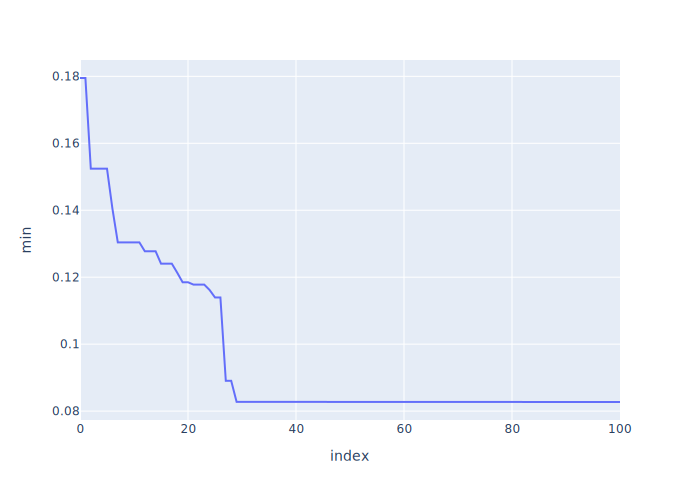

In [14]:
logs_df = pd.DataFrame(egp.log)
fig = px.line(logs_df,y='min')
fig.show('svg')

## Accessing Solutions

### Access an individual by index straight from the population array

In [15]:
egp.pop[1]

<class 'deap.creator.Individual'>[
	<class 'geppy.core.entity.Gene'> [protected_div, protected_div, x, -181082.86751933207, -61279.95744848286, mul, x, 50103.85142194022, -93137.25758283741, x, x, -98536.77157652899, x, -720022.4747420306, 418987.2510873118],
	<class 'geppy.core.entity.Gene'> [protected_div, sub, protected_div, mul, x, -181485.29088621246, x, x, 557201.3545337423, -333680.9290799386, -64311.44762523454, -110137.48989534784, -51653.4685729899, 252978.02038902827, x]
], linker=<built-in function add>

### Get an individual simplified/symbolic description according to its index on population array

In [16]:
# symbolic representation for the individual in the Nth position of population array
n = 0
egp.get_individual_simplified(n)

x*(9.62411465714687 - 1.74612295715416*x)

### Access best indivdual (solution) from population array

In [17]:
egp.best_individual

<class 'deap.creator.Individual'>[
	<class 'geppy.core.entity.Gene'> [protected_div, mul, -61279.95744848286, -610525.1098377301, x, mul, x, -3670.492492724553, x, x, x, x, 388163.6028249359, 740138.3348115361, x],
	<class 'geppy.core.entity.Gene'> [protected_div, sub, protected_div, mul, -108103.93187367373, -319107.74224163033, x, x, 557201.3545337423, x, -220646.13094320116, -20597.11432202194, x, 243617.44778837846, x]
], linker=<built-in function add>

### Get best individual simplified/symbolic description

In [18]:
egp.get_best_solution_simplified()

x*(9.62411465714687 - 1.74612295715416*x)

## Making predictions

### Get the solution as a Python function (Geppy converts the individual to a lambda function)

In [19]:
best_func = egp.get_best_solution_as_function()
best_func

<function src.easy_geppy.EasyGeppy.get_individual_solver_as_func.<locals>.solver(df)>

### Attaching predictions to dataframe

In [20]:
df['y_predicted'] = best_func(df)
df

,x,y,y1,y2,y3,y4,y_predicted
0,8.830596,-54.829669,-53.182582,-65.058884,-15.922841,-70.457927,-51.174988
1,-9.301202,-258.458463,-255.439767,-256.025654,-253.095336,-216.287662,-240.577036
2,7.744953,-30.580852,-27.292095,-38.415350,-19.223125,-48.993437,-30.201637
3,-6.841084,-155.472869,-151.119267,-148.810639,-137.678113,-98.079579,-147.558687
4,0.759670,22.150894,28.298640,16.284680,41.509688,-9.710990,6.303465
...,...,...,...,...,...,...,...
95,-3.070381,-46.269386,-42.781526,-50.736302,-14.931610,-15.078213,-46.010822
96,1.415474,21.408649,27.006467,29.384493,-10.814883,90.079863,10.124211
97,3.081654,11.402841,4.280514,2.255098,16.366273,13.140240,13.075976
98,7.136150,-11.388409,-9.059842,-18.803048,8.447452,-11.025254,-20.241544


### Checking sample

In [21]:
df.describe()

,x,y,y1,y2,y3,y4,y_predicted
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.094508,-53.341903,-52.993446,-54.167161,-52.149384,-55.266073,-57.113772
std,5.701238,93.540777,93.217266,95.165712,97.472003,94.146065,81.321130
min,-9.332821,-261.336337,-266.776593,-278.041434,-295.187970,-297.752937,-241.910146
25%,-4.970905,-92.964191,-88.972612,-95.781805,-87.556848,-98.038541,-91.044479
50%,0.952217,-16.432124,-18.226559,-17.872050,-14.580553,-23.366758,-26.701606
75%,4.344219,18.728028,21.028346,14.896105,11.717072,9.745450,7.143762
max,9.213856,49.945963,57.647305,46.512008,79.542057,90.079863,13.259146


## Plotting results

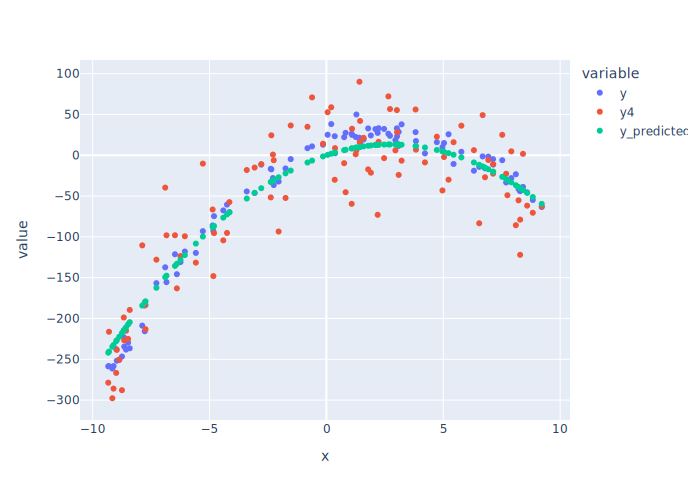

In [22]:
fig = px.scatter(df,x='x', y=['y',y_column,'y_predicted'])
fig.show('svg')

## Visualization: Expression Tree as a diagram

In [23]:
import geppy as gep

 # we want use symbol labels instead of words in the tree graph
rename_labels = {'add': '+', 'sub': '-', 'mul': '*', 'protected_div': '/'}  
gep.export_expression_tree(egp.best_individual, rename_labels, 'data/numerical_expression_tree.png')



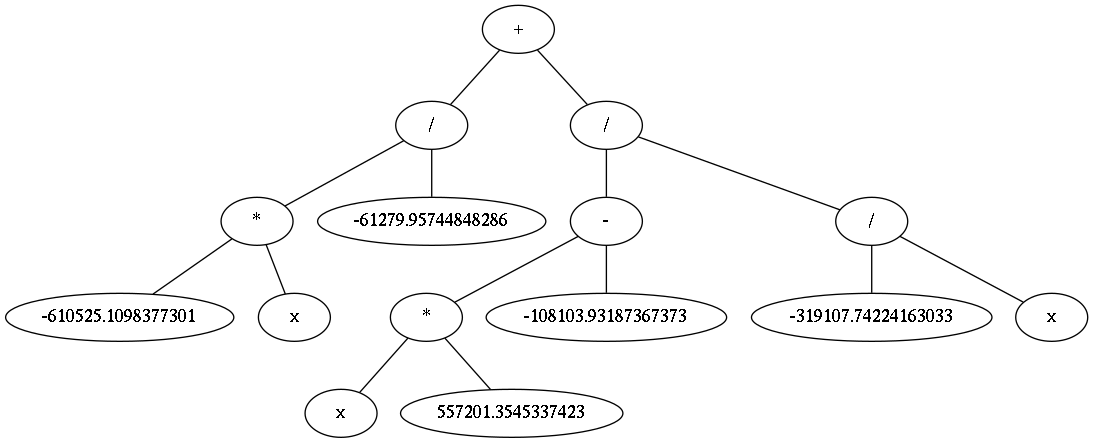

In [24]:
# show the above image here for convenience
from IPython.display import Image
Image(filename='data/numerical_expression_tree.png') 

## Train from a saved checkpoint

### As long as you have the previous SimpleGeppy object in memory
### you can start from where you stoped by calling launch_evolution again

In [25]:
egp.launch_evolution(n_pop=300, n_gen=100)

gen	nevals	size	avg        	std        	min      	max        
0  	0     	100 	1.44472e+12	1.33552e+13	0.0827192	1.33916e+14
1  	99    	100 	6.86725e+06	6.5514e+07 	0.0827192	6.58423e+08
2  	99    	100 	1.09234e+07	8.22317e+07	0.0827192	8.00534e+08
3  	99    	100 	2.728e+07  	2.206e+08  	0.0827192	2.17133e+09
4  	99    	100 	5.96819e+12	5.92217e+13	0.0827192	5.95214e+14
5  	99    	100 	1.05448e+17	1.04919e+18	0.0827192	1.05448e+19
6  	99    	100 	1.14429e+07	6.76812e+07	0.0827192	4.58464e+08
7  	99    	100 	2.19176e+07	1.35374e+08	0.0827192	1.16842e+09
8  	99    	100 	1.83552e+08	1.79975e+09	0.0827192	1.80893e+10
9  	99    	100 	2.37858e+06	2.35301e+07	0.0827192	2.36496e+08
10 	99    	100 	1.82821e+07	1.16989e+08	0.0827192	1.06584e+09
11 	99    	100 	2.92764e+07	2.82489e+08	0.0827192	2.83863e+09
12 	99    	100 	5.02789e+06	4.04448e+07	0.0827192	3.92392e+08
13 	99    	100 	4.55337e+12	4.53055e+13	0.0827192	4.55337e+14
14 	99    	100 	1.87049e+06	1.32435e+07	0.0827192	1.07966e+08
15 	99  

### The log variable gets restarted everytime you launch evolution

In [26]:
egp.log[:5]

[{'gen': 0,
  'nevals': 0,
  'size': 100,
  'avg': 1444719047837.1895,
  'std': 13355177035723.65,
  'min': 0.082719208172314,
  'max': 133915722595790.88},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 6867253.097772793,
  'std': 65513988.30423566,
  'min': 0.082719208172314,
  'max': 658423489.2584075},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 10923424.144545527,
  'std': 82231719.67535134,
  'min': 0.082719208172314,
  'max': 800534017.656311},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 27279991.63295724,
  'std': 220599612.1006731,
  'min': 0.082719208172314,
  'max': 2171327159.297134},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 5968186476571.272,
  'std': 59221657439919.2,
  'min': 0.082719208172314,
  'max': 595214101684799.1}]

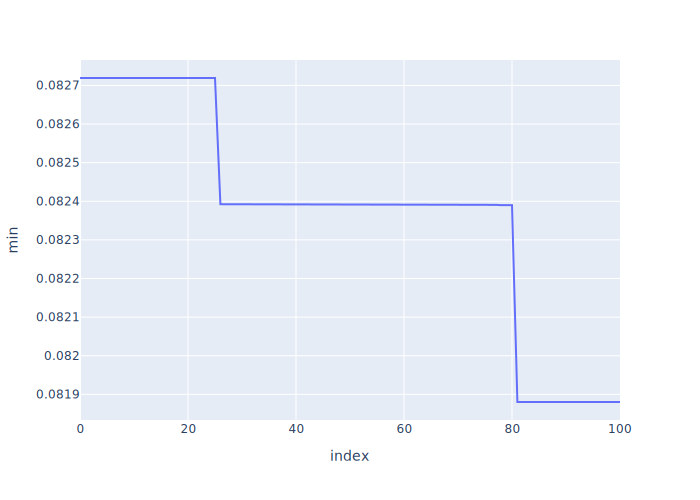

In [27]:
logs_df = pd.DataFrame(egp.log)
fig = px.line(logs_df,y='min')
fig.show('svg')

### But the logs variable keeps the story as a list of list for each execution

In [28]:
egp.logs[0][:5]

[{'gen': 0,
  'nevals': 100,
  'size': 100,
  'avg': 483563877929.1195,
  'std': 3283122910156.199,
  'min': 0.17950232109602776,
  'max': 27874888426218.758},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 3657169.9807074512,
  'std': 24125480.53092863,
  'min': 0.17950232109602776,
  'max': 196089355.77643034},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 1723984946707.001,
  'std': 17153419240108.09,
  'min': 0.1524183385133695,
  'max': 172398351419972.38},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 297166.4846020982,
  'std': 2955665.660311476,
  'min': 0.1524183385133695,
  'max': 29705668.258547567},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 4768990.491153001,
  'std': 35457793.48463662,
  'min': 0.1524183385133695,
  'max': 329229464.629255}]

In [29]:
egp.logs[1][:5]

[{'gen': 0,
  'nevals': 0,
  'size': 100,
  'avg': 1444719047837.1895,
  'std': 13355177035723.65,
  'min': 0.082719208172314,
  'max': 133915722595790.88},
 {'gen': 1,
  'nevals': 99,
  'size': 100,
  'avg': 6867253.097772793,
  'std': 65513988.30423566,
  'min': 0.082719208172314,
  'max': 658423489.2584075},
 {'gen': 2,
  'nevals': 99,
  'size': 100,
  'avg': 10923424.144545527,
  'std': 82231719.67535134,
  'min': 0.082719208172314,
  'max': 800534017.656311},
 {'gen': 3,
  'nevals': 99,
  'size': 100,
  'avg': 27279991.63295724,
  'std': 220599612.1006731,
  'min': 0.082719208172314,
  'max': 2171327159.297134},
 {'gen': 4,
  'nevals': 99,
  'size': 100,
  'avg': 5968186476571.272,
  'std': 59221657439919.2,
  'min': 0.082719208172314,
  'max': 595214101684799.1}]

### You must clean it by using clan_logs() function

In [30]:
egp.clean_logs()
egp.logs

[]

### Get and use new results

In [31]:
best_func = egp.get_best_solution_as_function()
best_func

<function src.easy_geppy.EasyGeppy.get_individual_solver_as_func.<locals>.solver(df)>

In [32]:
df['y_predicted'] = best_func(df)
df

,x,y,y1,y2,y3,y4,y_predicted
0,8.830596,-54.829669,-53.182582,-65.058884,-15.922841,-70.457927,-63.678729
1,-9.301202,-258.458463,-255.439767,-256.025654,-253.095336,-216.287662,-260.918853
2,7.744953,-30.580852,-27.292095,-38.415350,-19.223125,-48.993437,-39.497353
3,-6.841084,-155.472869,-151.119267,-148.810639,-137.678113,-98.079579,-159.175943
4,0.759670,22.150894,28.298640,16.284680,41.509688,-9.710990,6.446143
...,...,...,...,...,...,...,...
95,-3.070381,-46.269386,-42.781526,-50.736302,-14.931610,-15.078213,-48.924259
96,1.415474,21.408649,27.006467,29.384493,-10.814883,90.079863,10.205602
97,3.081654,11.402841,4.280514,2.255098,16.366273,13.140240,12.232880
98,7.136150,-11.388409,-9.059842,-18.803048,8.447452,-11.025254,-27.943260


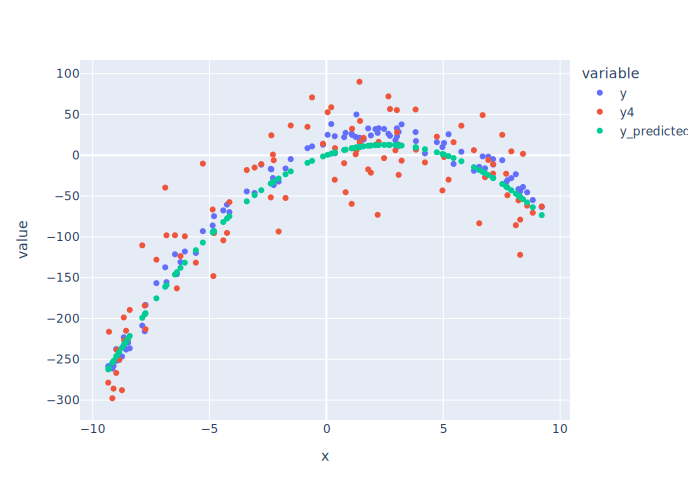

In [33]:
fig = px.scatter(df,x='x', y=['y',y_column,'y_predicted'])
fig.show('svg')

In [34]:
egp.get_best_solution_simplified()

x*(9.96288403677482 - 1.94483278266261*x)